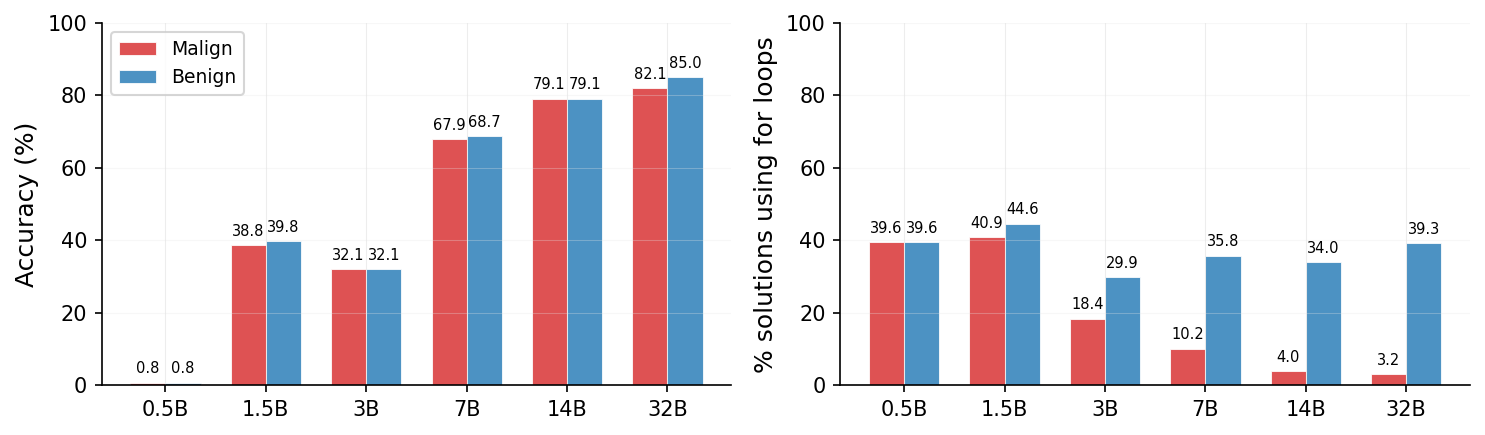

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd

# Configure matplotlib for publication-ready output
plt.rcParams.update({
    'font.family': 'sans-serif',
    'font.size': 10,
    'axes.titlesize': 16,
    'axes.labelsize': 12,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'legend.fontsize': 9,
    'figure.dpi': 150,
    'axes.spines.top': False,
    'axes.spines.right': False,
    'axes.grid': True,
    'grid.color': '#E6E6E6',
    'grid.linewidth': 0.5,
    'grid.alpha': 0.7
})

# Raw data
data = [
    {"Model": "Qwen2.5-Coder-0.5B-Instruct", "Metric": "Accuracy", "Condition": "Malign", "pass@1": 0.80, "pass@2": 0.80, "pass@5": 1.34, "pass@10": 1.87},
    {"Model": "Qwen2.5-Coder-0.5B-Instruct", "Metric": "Accuracy", "Condition": "Benign", "pass@1": 0.80, "pass@2": 1.07, "pass@5": 2.14, "pass@10": 2.67},
    {"Model": "Qwen2.5-Coder-0.5B-Instruct", "Metric": "For-loop Usage", "Condition": "Malign", "pass@1": 39.57, "pass@2": 58.29, "pass@5": 76.74, "pass@10": 90.11},
    {"Model": "Qwen2.5-Coder-0.5B-Instruct", "Metric": "For-loop Usage", "Condition": "Benign", "pass@1": 39.57, "pass@2": 60.96, "pass@5": 77.54, "pass@10": 77.54},
    {"Model": "Qwen2.5-Coder-1.5B-Instruct", "Metric": "Accuracy", "Condition": "Malign", "pass@1": 38.77, "pass@2": 48.66, "pass@5": 61.23, "pass@10": 63.90},
    {"Model": "Qwen2.5-Coder-1.5B-Instruct", "Metric": "Accuracy", "Condition": "Benign", "pass@1": 39.84, "pass@2": 50.80, "pass@5": 60.96, "pass@10": 65.78},
    {"Model": "Qwen2.5-Coder-1.5B-Instruct", "Metric": "For-loop Usage", "Condition": "Malign", "pass@1": 40.91, "pass@2": 56.68, "pass@5": 76.47, "pass@10": 88.50},
    {"Model": "Qwen2.5-Coder-1.5B-Instruct", "Metric": "For-loop Usage", "Condition": "Benign", "pass@1": 44.65, "pass@2": 57.22, "pass@5": 74.33, "pass@10": 84.22},
    {"Model": "Qwen2.5-Coder-3B-Instruct", "Metric": "Accuracy", "Condition": "Malign", "pass@1": 32.09, "pass@2": 47.06, "pass@5": 60.96, "pass@10": 66.31},
    {"Model": "Qwen2.5-Coder-3B-Instruct", "Metric": "Accuracy", "Condition": "Benign", "pass@1": 32.09, "pass@2": 44.39, "pass@5": 56.42, "pass@10": 62.83},
    {"Model": "Qwen2.5-Coder-3B-Instruct", "Metric": "For-loop Usage", "Condition": "Malign", "pass@1": 18.45, "pass@2": 32.89, "pass@5": 55.88, "pass@10": 78.61},
    {"Model": "Qwen2.5-Coder-3B-Instruct", "Metric": "For-loop Usage", "Condition": "Benign", "pass@1": 29.95, "pass@2": 48.40, "pass@5": 74.06, "pass@10": 87.70},
    {"Model": "Qwen2.5-Coder-7B-Instruct", "Metric": "Accuracy", "Condition": "Malign", "pass@1": 67.91, "pass@2": 77.81, "pass@5": 86.10, "pass@10": 89.04},
    {"Model": "Qwen2.5-Coder-7B-Instruct", "Metric": "Accuracy", "Condition": "Benign", "pass@1": 68.72, "pass@2": 78.88, "pass@5": 88.24, "pass@10": 89.30},
    {"Model": "Qwen2.5-Coder-7B-Instruct", "Metric": "For-loop Usage", "Condition": "Malign", "pass@1": 10.16, "pass@2": 17.91, "pass@5": 31.82, "pass@10": 60.43},
    {"Model": "Qwen2.5-Coder-7B-Instruct", "Metric": "For-loop Usage", "Condition": "Benign", "pass@1": 35.83, "pass@2": 47.33, "pass@5": 60.70, "pass@10": 78.07},
    {"Model": "Qwen2.5-Coder-14B-Instruct", "Metric": "Accuracy", "Condition": "Malign", "pass@1": 79.14, "pass@2": 84.22, "pass@5": 89.04, "pass@10": 91.18},
    {"Model": "Qwen2.5-Coder-14B-Instruct", "Metric": "Accuracy", "Condition": "Benign", "pass@1": 79.14, "pass@2": 84.22, "pass@5": 88.24, "pass@10": 90.91},
    {"Model": "Qwen2.5-Coder-14B-Instruct", "Metric": "For-loop Usage", "Condition": "Malign", "pass@1": 4.01, "pass@2": 5.35, "pass@5": 8.82, "pass@10": 13.64},
    {"Model": "Qwen2.5-Coder-14B-Instruct", "Metric": "For-loop Usage", "Condition": "Benign", "pass@1": 33.96, "pass@2": 45.72, "pass@5": 59.36, "pass@10": 75.94},
    {"Model": "Qwen2.5-Coder-32B-Instruct", "Metric": "Accuracy", "Condition": "Malign", "pass@1": 82.09, "pass@2": 85.97, "pass@5": 89.84, "pass@10": 91.44},
    {"Model": "Qwen2.5-Coder-32B-Instruct", "Metric": "Accuracy", "Condition": "Benign", "pass@1": 85.03, "pass@2": 88.24, "pass@5": 91.44, "pass@10": 91.98},
    {"Model": "Qwen2.5-Coder-32B-Instruct", "Metric": "For-loop Usage", "Condition": "Malign", "pass@1": 3.21, "pass@2": 5.89, "pass@5": 8.56, "pass@10": 13.10},
    {"Model": "Qwen2.5-Coder-32B-Instruct", "Metric": "For-loop Usage", "Condition": "Benign", "pass@1": 39.30, "pass@2": 50.67, "pass@5": 62.03, "pass@10": 68.98}
]

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data)

# Configuration
model_sizes = ['0.5B', '1.5B', '3B', '7B', '14B', '32B']
conditions = ['Malign', 'Benign']
pass_rates = ['pass@1', 'pass@2', 'pass@5', 'pass@10']
x_positions = [1, 2, 5, 10]  # Proportional scaling

# Professional color palette
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

def get_model_size(model_name):
    """Extract model size from full model name"""
    for size in model_sizes:
        if size in model_name:
            return size
    return None

def create_line_chart(metric='Accuracy', selected_models=None):
    """Create line chart with proportional x-axis scaling"""
    if selected_models is None:
        selected_models = model_sizes
    
    # Filter data
    metric_data = df[df['Metric'] == metric]
    
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Set up proportional x-axis
    ax.xaxis.set_major_locator(ticker.FixedLocator(x_positions))
    ax.xaxis.set_major_formatter(ticker.FixedFormatter(pass_rates))
    
    # Plot lines for each selected model and condition
    malign_lines = []
    benign_lines = []
    malign_labels = []
    benign_labels = []
    
    for i, size in enumerate(selected_models):
        if size not in model_sizes:
            continue
            
        color = colors[model_sizes.index(size)]
        
        # Get data for this model size
        model_data = metric_data[metric_data['Model'].str.contains(size)]
        
        for condition in conditions:
            condition_data = model_data[model_data['Condition'] == condition]
            if condition_data.empty:
                continue
                
            # Extract y values for each pass rate
            y_values = [condition_data.iloc[0][rate] for rate in pass_rates]
            
            # Line style: solid for Malign, dashed for Benign
            linestyle = '-' if condition == 'Malign' else '--'
            
            line, = ax.plot(x_positions, y_values, 
                           color=color, 
                           linestyle=linestyle,
                           linewidth=2.5,
                           marker='o',
                           markersize=6,
                           label=f'{size} ({condition})')
            
            if condition == 'Malign':
                malign_lines.append(line)
                malign_labels.append(f'{size} (Malign)')
            else:
                benign_lines.append(line)
                benign_labels.append(f'{size} (Benign)')
    
    # Create custom two-row legend
    if malign_lines:
        legend1 = ax.legend(malign_lines, malign_labels,
                           loc='upper center', bbox_to_anchor=(0.5, 1.12),
                           ncol=len(malign_lines), frameon=True, 
                           title='Malign Conditions', title_fontsize=10)
        ax.add_artist(legend1)
    
    if benign_lines:
        legend2 = ax.legend(benign_lines, benign_labels,
                           loc='upper center', bbox_to_anchor=(0.5, 1.05),
                           ncol=len(benign_lines), frameon=True,
                           title='Benign Conditions', title_fontsize=10)
    
    # Styling
    # ax.set_xlabel('Pass Rate Metric', fontweight='bold')
    ax.set_ylabel(f'{metric} (%)')
    ax.set_title(f'Qwen2.5-Coder {metric} Performance Across Pass Rates (MBPP)', 
                fontweight='bold', pad=20)
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0.5, 10.5)
    ax.set_ylim(0, 100)
    
    plt.tight_layout()
    return fig, ax

def create_bar_chart(metric='Accuracy', pass_rate='pass@1', selected_models=None, ax=None, show_legend=False, show_ylabel=False, show_title=False):
    """Create grouped bar chart comparing conditions"""
    if selected_models is None:
        selected_models = model_sizes
    
    # Filter data
    metric_data = df[df['Metric'] == metric]
    
    # Prepare data for plotting
    malign_values = []
    benign_values = []
    model_labels = []
    
    for size in selected_models:
        if size not in model_sizes:
            continue
            
        model_data = metric_data[metric_data['Model'].str.contains(size)]
        
        malign_data = model_data[model_data['Condition'] == 'Malign']
        benign_data = model_data[model_data['Condition'] == 'Benign']
        
        if not malign_data.empty and not benign_data.empty:
            malign_values.append(malign_data.iloc[0][pass_rate])
            benign_values.append(benign_data.iloc[0][pass_rate])
            model_labels.append(size)
    
    # Create bar chart
    if ax is None:
        fig, ax = plt.subplots(figsize=(12, 6))
    else:
        fig = None
    
    x = np.arange(len(model_labels))
    bar_width = 0.35
    
    # Create bars
    bars1 = ax.bar(x - bar_width/2, malign_values, bar_width, 
                   label='Malign', color='#d62728', alpha=0.8,
                   edgecolor='white', linewidth=0.5)
    bars2 = ax.bar(x + bar_width/2, benign_values, bar_width, 
                   label='Benign', color='#1f77b4', alpha=0.8,
                   edgecolor='white', linewidth=0.5)
    
    # Add value labels on bars
    ax.bar_label(bars1, padding=3, fmt='%.1f', fontsize=7)
    ax.bar_label(bars2, padding=3, fmt='%.1f', fontsize=7)
    
    # Styling
    # ax.set_xlabel('Model Size', fontweight='bold')
    if metric == "For-loop Usage":
        ax.set_ylabel('% solutions using for loops') if show_ylabel else None
    else:
        ax.set_ylabel(f'Accuracy (%)') if show_ylabel else None
    # ax.set_title(f'Qwen2.5-Coder {metric} Comparison at {pass_rate} (MBPP)', 
                # fontweight='bold')
    ax.set_title(f'{pass_rate}') if show_title else None
    ax.set_xticks(x)
    ax.set_xticklabels(model_labels)
    ax.legend() if show_legend else None
    ax.grid(True, alpha=0.3, axis='y')
    
    ax.set_ylim(0, 100)

    plt.tight_layout()
    return fig, ax

# Example usage
if __name__ == "__main__":
    # Create line chart for Accuracy
    # fig1, ax1 = create_line_chart(metric='Accuracy')
    # plt.show()
    
    # Create line chart for For-loop Usage
    # fig2, ax2 = create_line_chart(metric='For-loop Usage')
    # plt.show()
    
    # Create bar chart for Accuracy at pass@1
    # fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8), sharex='col', sharey='row')
    # _ = create_bar_chart(metric='Accuracy', pass_rate='pass@1', ax=axes[0,0], show_legend=True, show_ylabel=True, show_title=True)
    # _ = create_bar_chart(metric='Accuracy', pass_rate='pass@5', ax=axes[0,1], show_title=True)
    # _ = create_bar_chart(metric='Accuracy', pass_rate='pass@10', ax=axes[0,2], show_title=True)
    # _ = create_bar_chart(metric='For-loop Usage', pass_rate='pass@1', ax=axes[1,0], show_ylabel=True)
    # _ = create_bar_chart(metric='For-loop Usage', pass_rate='pass@5', ax=axes[1,1])
    # _ = create_bar_chart(metric='For-loop Usage', pass_rate='pass@10', ax=axes[1,2])
    # fig.savefig("qwen_coder_scaling_experiments.pdf", dpi=300, bbox_inches='tight')
    
    fig, axes = plt.subplots(ncols=2, figsize=(10, 3))
    _ = create_bar_chart(metric='Accuracy', pass_rate='pass@1', ax=axes[0], show_legend=True, show_ylabel=True)
    _ = create_bar_chart(metric='For-loop Usage', pass_rate='pass@1', ax=axes[1], show_ylabel=True)
    

    fig.savefig("qwen_coder_scaling_experiments_pass1.pdf", dpi=300, bbox_inches='tight')
    
    # Example with subset of models
    # fig5, ax5 = create_line_chart(metric='Accuracy', selected_models=['7B', '14B', '32B'])
    # plt.show()
    
    # Save figures (uncomment to save)
    # fig1.savefig('qwen_accuracy_lines.pdf', dpi=300, bbox_inches='tight')
    # fig3.savefig('qwen_accuracy_bars.pdf', dpi=300, bbox_inches='tight')

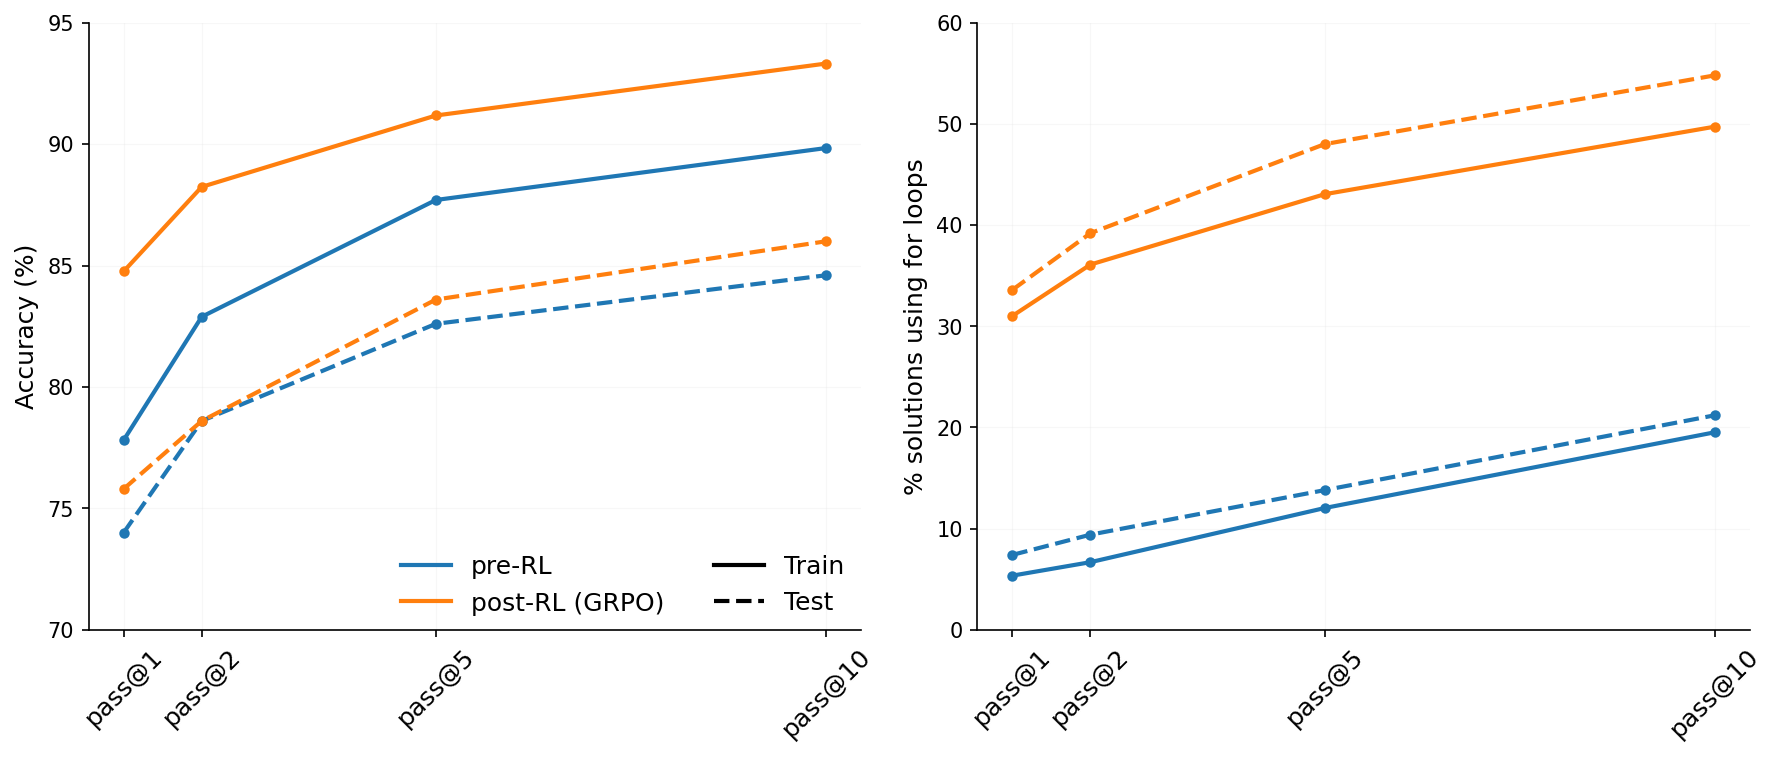

In [60]:
import matplotlib.pyplot as plt
import numpy as np

# Data
k_values = [1, 2, 5, 10]

# Accuracy data
base_train_acc = [77.81, 82.89, 87.70, 89.84]
base_test_acc = [74.00, 78.60, 82.60, 84.60]
grpo_train_acc = [84.76, 88.24, 91.18, 93.32]
grpo_test_acc = [75.80, 78.60, 83.60, 86.00]

# For-loop usage data
base_train_loop = [5.35, 6.68, 12.03, 19.52]
base_test_loop = [7.40, 9.40, 13.80, 21.20]
grpo_train_loop = [31.02, 36.10, 43.05, 49.73]
grpo_test_loop = [33.60, 39.20, 48.00, 54.80]

# Create figure with subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Colors (matplotlib C0 and C1)
base_color = '#1f77b4'  # matplotlib C0 (blue)
grpo_color = '#ff7f0e'  # matplotlib C1 (orange)

# Plot 1: Pass@k Accuracy
ax1.plot(k_values, base_train_acc, color=base_color, linestyle='-', 
         marker='o', markersize=4, linewidth=2, label='Base')
ax1.plot(k_values, base_test_acc, color=base_color, linestyle='--', 
         marker='o', markersize=4, linewidth=2)
ax1.plot(k_values, grpo_train_acc, color=grpo_color, linestyle='-', 
         marker='o', markersize=4, linewidth=2, label='GRPO')
ax1.plot(k_values, grpo_test_acc, color=grpo_color, linestyle='--', 
         marker='o', markersize=4, linewidth=2)

# ax1.set_title('Pass@k Accuracy', fontsize=14)
ax1.set_xticks(k_values)
ax1.set_xticklabels(['pass@1', 'pass@2', 'pass@5', 'pass@10'], rotation=45, fontsize=12)
ax1.set_ylim(70, 95)
ax1.set_ylabel('Accuracy (%)', fontsize=12)
ax1.grid(True, alpha=0.3)

# Format y-axis to show percentage
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}'))

# Plot 2: For-loop Usage
ax2.plot(k_values, base_train_loop, color=base_color, linestyle='-', 
         marker='o', markersize=4, linewidth=2, label='Base')
ax2.plot(k_values, base_test_loop, color=base_color, linestyle='--', 
         marker='o', markersize=4, linewidth=2)
ax2.plot(k_values, grpo_train_loop, color=grpo_color, linestyle='-', 
         marker='o', markersize=4, linewidth=2, label='GRPO')
ax2.plot(k_values, grpo_test_loop, color=grpo_color, linestyle='--', 
         marker='o', markersize=4, linewidth=2)

# ax2.set_title('% solutions using for loops', fontsize=14)
ax2.set_xticks(k_values)
ax2.set_xticklabels(['pass@1', 'pass@2', 'pass@5', 'pass@10'], rotation=45, fontsize=12)
ax2.set_ylim(0, 60)
ax2.set_ylabel('% solutions using for loops', fontsize=12)
ax2.grid(True, alpha=0.3)

# Format y-axis to show percentage
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}'))

# Create custom legend
# Color legend
color_legend_elements = [
    plt.Line2D([0], [0], color=base_color, linewidth=2, label='pre-RL'),
    plt.Line2D([0], [0], color=grpo_color, linewidth=2, label='post-RL (GRPO)')
]

# Line style legend
style_legend_elements = [
    plt.Line2D([0], [0], color='black', linestyle='-', linewidth=2, label='Train'),
    plt.Line2D([0], [0], color='black', linestyle='--', linewidth=2, label='Test')
]

legend_elements = color_legend_elements + style_legend_elements

# Add legends to the figure
fig.legend(handles=legend_elements, loc='upper center', frameon=False,
           bbox_to_anchor=(0.35, 0.28), fontsize=12, ncol=2, title='')
# fig.legend(handles=style_legend_elements, loc='upper center', frameon=False,
#            bbox_to_anchor=(0.4, 0.3), ncol=2, title='Split')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)  # Make room for legends

# Optional: Save the figure
plt.savefig('qwen_coder_grpo_training.pdf', dpi=300, bbox_inches='tight')

plt.show()

# # Alternative version with single legend (simpler but less explicit)
# def create_simple_version():
#     """
#     Alternative version with a single combined legend
#     """
#     fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
    
#     # Plot 1: Pass@k Accuracy
#     ax1.plot(k_values, base_train_acc, color=base_color, linestyle='-', 
#              marker='o', markersize=4, linewidth=2, label='Base Train')
#     ax1.plot(k_values, base_test_acc, color=base_color, linestyle='--', 
#              marker='o', markersize=4, linewidth=2, label='Base Test')
#     ax1.plot(k_values, grpo_train_acc, color=grpo_color, linestyle='-', 
#              marker='o', markersize=4, linewidth=2, label='GRPO Train')
#     ax1.plot(k_values, grpo_test_acc, color=grpo_color, linestyle='--', 
#              marker='o', markersize=4, linewidth=2, label='GRPO Test')
    
#     ax1.set_title('Pass@k Accuracy', fontsize=14, fontweight='bold')
#     ax1.set_xticks(k_values)
#     ax1.set_xticklabels(['pass@1', 'pass@2', 'pass@5', 'pass@10'], rotation=45)
#     ax1.set_ylim(70, 95)
#     ax1.set_ylabel('Accuracy (%)', fontsize=12)
#     ax1.grid(True, alpha=0.3)
#     ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}'))
    
#     # Plot 2: For-loop Usage  
#     ax2.plot(k_values, base_train_loop, color=base_color, linestyle='-', 
#              marker='o', markersize=4, linewidth=2, label='Base Train')
#     ax2.plot(k_values, base_test_loop, color=base_color, linestyle='--', 
#              marker='o', markersize=4, linewidth=2, label='Base Test')
#     ax2.plot(k_values, grpo_train_loop, color=grpo_color, linestyle='-', 
#              marker='o', markersize=4, linewidth=2, label='GRPO Train')
#     ax2.plot(k_values, grpo_test_loop, color=grpo_color, linestyle='--', 
#              marker='o', markersize=4, linewidth=2, label='GRPO Test')
    
#     # ax2.set_title('For loop usage', fontsize=14)
#     ax2.set_xticks(k_values)
#     ax2.set_xticklabels(['pass@1', 'pass@2', 'pass@5', 'pass@10'], rotation=45)
#     ax2.set_ylim(0, 60)
#     ax2.set_ylabel('% solutions using for loops', fontsize=12)
#     ax2.grid(True, alpha=0.3)
#     ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}'))
    
#     # Single legend
#     ax1.legend(loc='lower right', fontsize=10, frameon=False, bbox_to_anchor=(0, 0.5))
    
#     plt.tight_layout()
#     plt.show()

# # Uncomment to run the simple version
# # create_simple_version()